# Module: 8 _NumPy, Pandas, Matplotlib

# ASSESSMENT 1

In [1]:
import pandas as pd
dataset=pd.read_csv("C:\\Users\\Hinali\\Downloads\\banklist (1).csv")

In [2]:
dataset.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,05-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,03-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [3]:
dataset.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [4]:
print(dataset['ST'].nunique())

44


In [5]:
unique_states_list = dataset['ST'].unique()
print("Unique states:", unique_states_list)

Unique states: ['IL' 'WI' 'LA' 'UT' 'NJ' 'AR' 'GA' 'PA' 'TN' 'WA' 'CO' 'PR' 'FL' 'MN'
 'CA' 'MD' 'OK' 'OH' 'SC' 'VA' 'ID' 'TX' 'CT' 'AZ' 'NV' 'NC' 'KY' 'MO'
 'KS' 'AL' 'MI' 'IN' 'IA' 'NE' 'MS' 'NM' 'OR' 'NY' 'MA' 'SD' 'WY' 'WV'
 'NH' 'HI']


In [6]:
state_counts = dataset['ST'].value_counts()
top_5_states = state_counts.head(5).reset_index()
top_5_states

,ST,count
0,GA,93
1,FL,75
2,IL,68
3,CA,41
4,MN,23


In [7]:
top_acquirers = dataset['Acquiring Institution'].value_counts().head(5).reset_index()
top_acquirers

,Acquiring Institution,count
0,No Acquirer,31
1,State Bank and Trust Company,12
2,First-Citizens Bank & Trust Company,11
3,Ameris Bank,10
4,U.S. Bank N.A.,9


In [8]:
sbt_acquisitions = dataset[dataset['Acquiring Institution'] == 'State Bank of Texas']
total_acquisitions = sbt_acquisitions.shape[0]
texas_acquisitions = sbt_acquisitions[sbt_acquisitions['ST'] == 'TX'].shape[0]
print("Total banks acquired by State Bank of Texas:", total_acquisitions)
print("Number of those banks that were in Texas:", texas_acquisitions)

Total banks acquired by State Bank of Texas: 3
Number of those banks that were in Texas: 1


In [9]:
california_banks = dataset[dataset['ST'] == 'CA']

most_common_city = california_banks['City'].value_counts().idxmax()
failure_count = california_banks['City'].value_counts().max()

print(f"The most common city in California for a bank to fail in is: {most_common_city}")
print(f"Number of failures in {most_common_city}: {failure_count}")

The most common city in California for a bank to fail in is: Los Angeles
Number of failures in Los Angeles: 4


# Assessment 2

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("C:\\Users\\Hinali\\Downloads\\historical_automobile_sales.csv")
data.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


<Axes: xlabel='Year', ylabel='Automobile_Sales'>

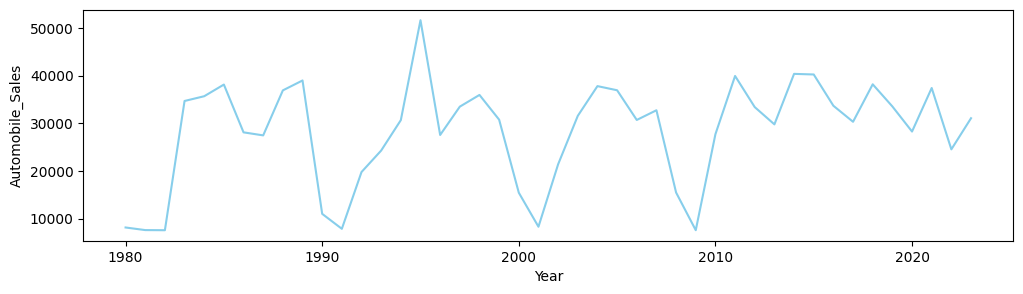

In [11]:
plt.figure(figsize=(12,3))
year1=data.groupby("Year")["Automobile_Sales"].sum().reset_index()
sns.lineplot(data=year1,x='Year',y='Automobile_Sales',color='skyblue')

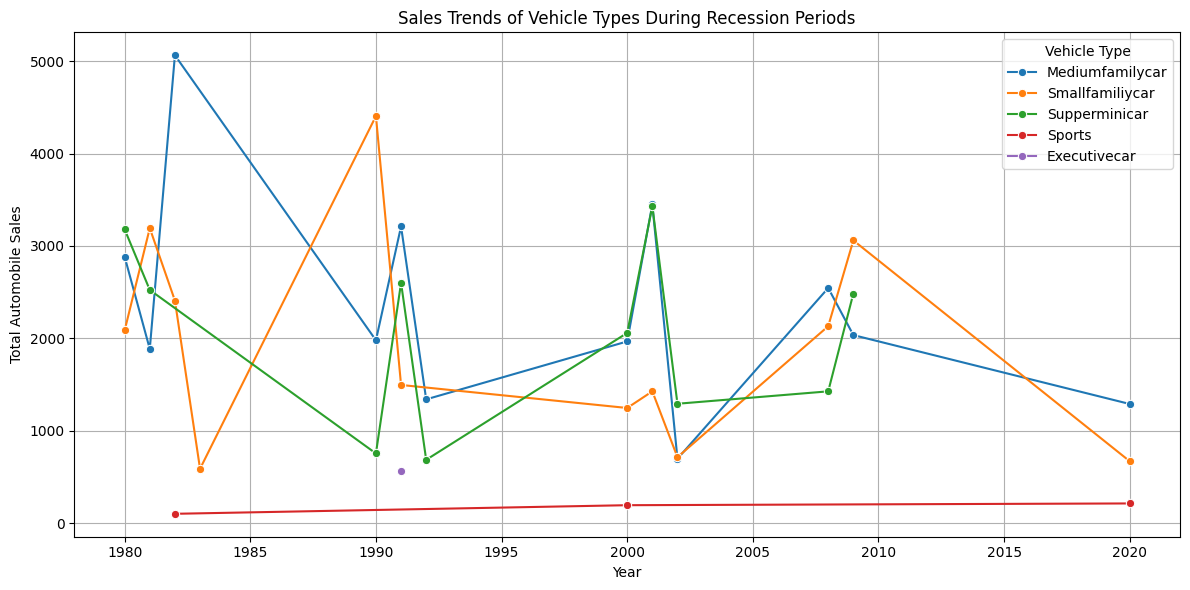

In [12]:

recession_data = data[data['Recession'] == 1]

recession_grouped = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=recession_grouped, x='Year', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.title('Sales Trends of Vehicle Types During Recession Periods')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Vehicle Type')
plt.show()


In [23]:
grouped = data.groupby(['Year', 'Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()
grouped
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=grouped, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', markers=True)

# plt.title('Sales Trend per Vehicle Type during Recession vs Non-Recession')
# plt.ylabel('Total Sales')
# plt.xlabel('Year')
# plt.legend(title='Vehicle Type / Recession')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

,Year,Vehicle_Type,Recession,Automobile_Sales
0,1980,Mediumfamilycar,1,2882.5
1,1980,Smallfamiliycar,1,2085.7
2,1980,Supperminicar,1,3179.2
3,1981,Mediumfamilycar,1,1885.2
4,1981,Smallfamiliycar,1,3192.1
...,...,...,...,...
195,2022,Sports,0,4596.5
196,2023,Executivecar,0,1579.6
197,2023,Smallfamiliycar,0,10658.5
198,2023,Sports,0,12401.0


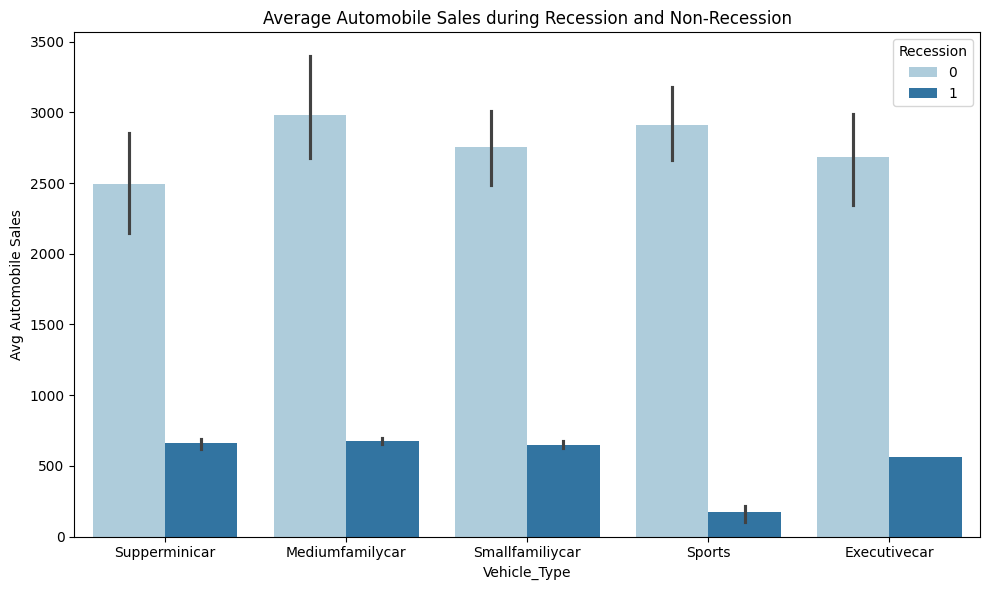

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data,x='Vehicle_Type',y='Automobile_Sales',hue='Recession',estimator='mean',palette='Paired',)
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xlabel('Vehicle_Type')
plt.ylabel('Avg Automobile Sales')
plt.legend(title='Recession')
plt.tight_layout()
plt.show()